In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../../Data/Fish/Total_fish_landings_per_year.csv')

In [3]:
df = df.rename(columns=df.iloc[0])
df = df.iloc[1:]
df.reset_index(drop=True, inplace=True)

In [4]:
df.columns = df.columns.str.strip()

In [5]:
# df['Year'] = df['Year'].astype(int)
df['Pounds'] = df['Pounds'].str.replace(',', '').astype(float)
df['Dollars'] = df['Dollars'].str.replace(',', '').astype(float)
df['Metric Tons'] = df['Metric Tons'].str.replace(',', '').astype(float)

In [6]:
df

,Year,Pounds,Metric Tons,Dollars,Collection
0,1950,4.910009e+09,2227165.0,3.261401e+08,Commercial
1,1951,4.468280e+09,2026799.0,3.437687e+08,Commercial
2,1952,4.454820e+09,2020693.0,3.422609e+08,Commercial
3,1953,4.541451e+09,2059989.0,3.366746e+08,Commercial
4,1954,4.783727e+09,2169884.0,3.411977e+08,Commercial
...,...,...,...,...,...
67,2017,9.958912e+09,4517333.0,5.832311e+09,Commercial
68,2018,9.425680e+09,4275460.0,5.692645e+09,Commercial
69,2019,9.370778e+09,4250557.0,5.615293e+09,Commercial
70,2020,8.401031e+09,3810682.0,4.931423e+09,Commercial


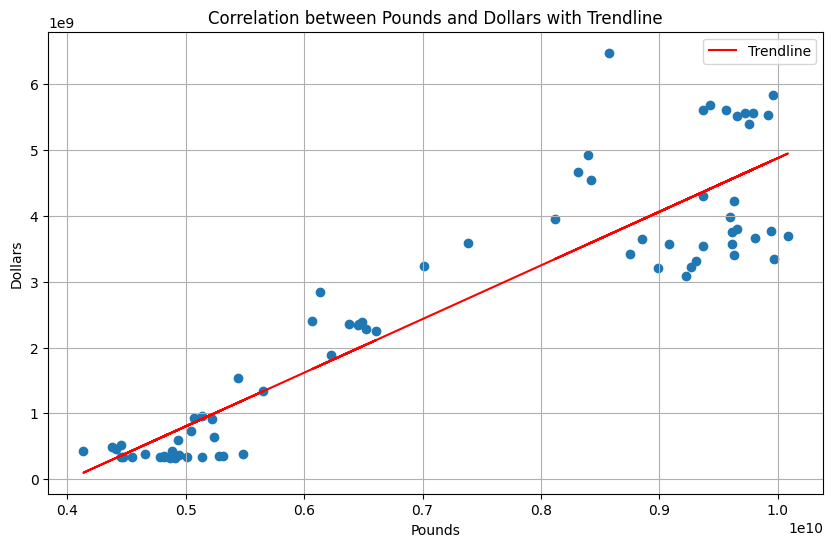

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Pounds'], df['Dollars'])

z = np.polyfit(df['Pounds'], df['Dollars'], 1)
p = np.poly1d(z)
plt.plot(df['Pounds'], p(df['Pounds']), color='red', label='Trendline')

plt.xlabel('Pounds')
plt.ylabel('Dollars')
plt.title('Correlation between Pounds and Dollars with Trendline')
plt.legend()
plt.grid(True)
plt.show()

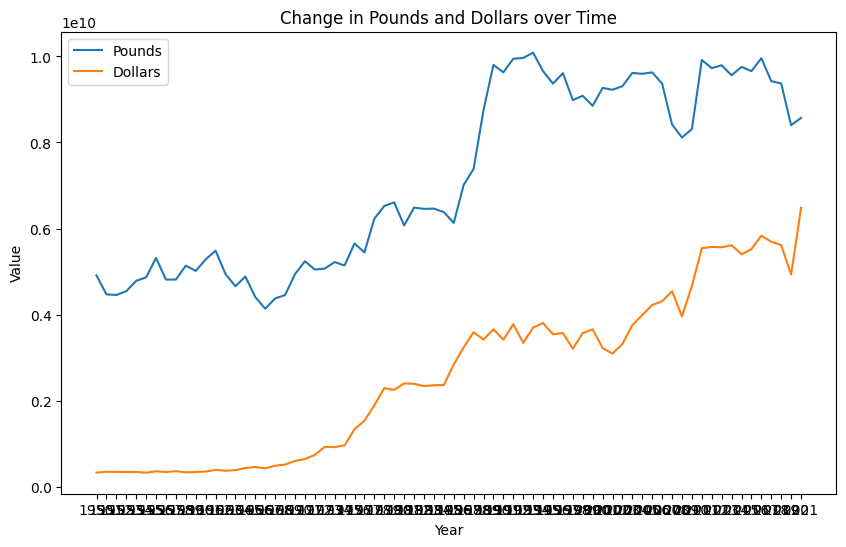

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Pounds'], label='Pounds')
plt.plot(df['Year'], df['Dollars'], label='Dollars')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Change in Pounds and Dollars over Time')
plt.legend()
plt.show()

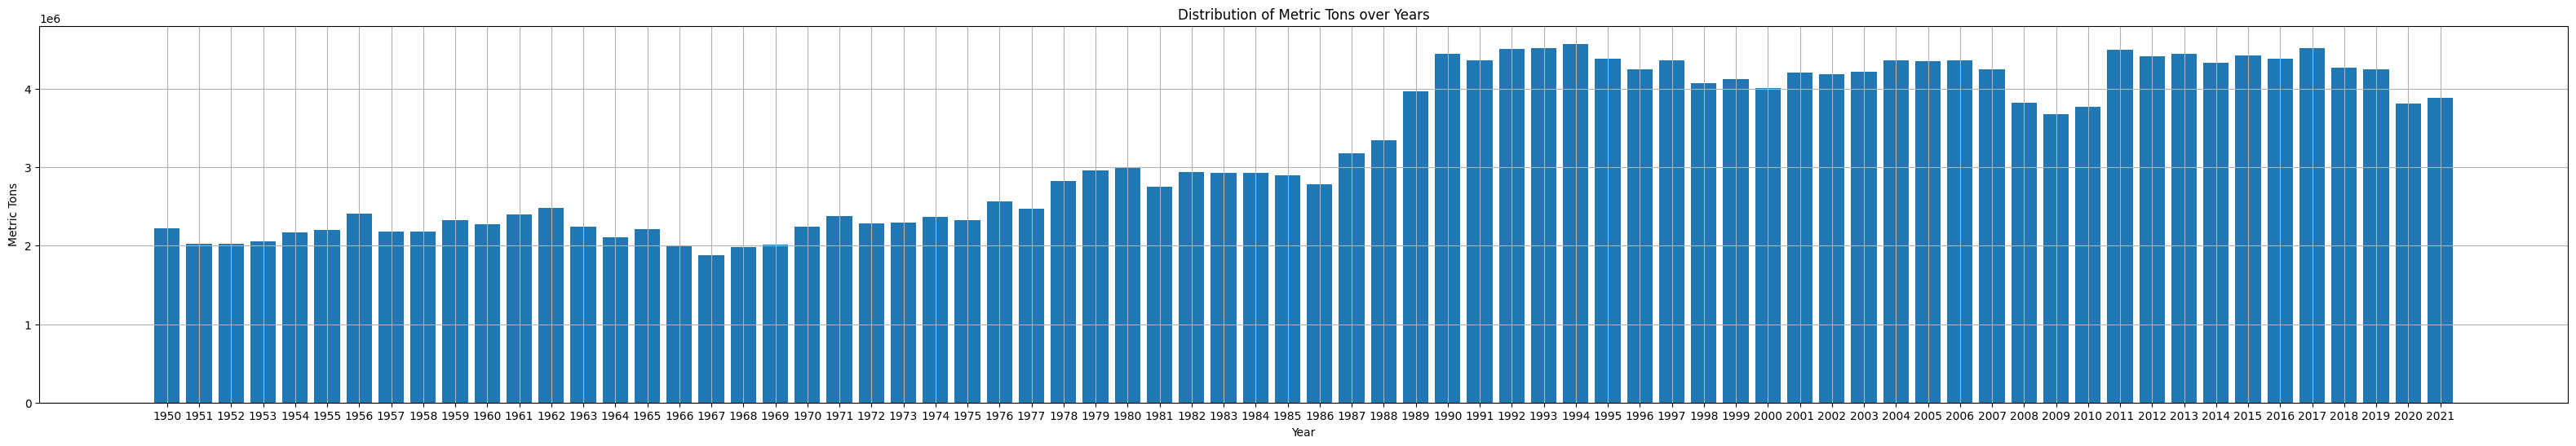

In [9]:
plt.figure(figsize=(40, 6))
plt.bar(df['Year'], df['Metric Tons'])
plt.xlabel('Year')
plt.ylabel('Metric Tons')
plt.title('Distribution of Metric Tons over Years')
plt.grid(True)
plt.show()

In [10]:
pounds_stats = df['Pounds'].describe()
dollars_stats = df['Dollars'].describe()
print("Pounds Summary Statistics:\n", pounds_stats)
print("\nDollars Summary Statistics:\n", dollars_stats)

Pounds Summary Statistics:
 count    7.200000e+01
mean     7.194124e+09
std      2.122016e+09
min      4.134834e+09
25%      5.062592e+09
50%      6.565721e+09
75%      9.384503e+09
max      1.008678e+10
Name: Pounds, dtype: float64

Dollars Summary Statistics:
 count    7.200000e+01
mean     2.591187e+09
std      1.899538e+09
min      3.219790e+08
25%      4.765578e+08
50%      2.618656e+09
75%      3.782058e+09
max      6.480000e+09
Name: Dollars, dtype: float64


In [11]:
correlation = df['Pounds'].corr(df['Dollars'])
print("\nCorrelation between Pounds and Dollars:", correlation)


Correlation between Pounds and Dollars: 0.9104348958322622


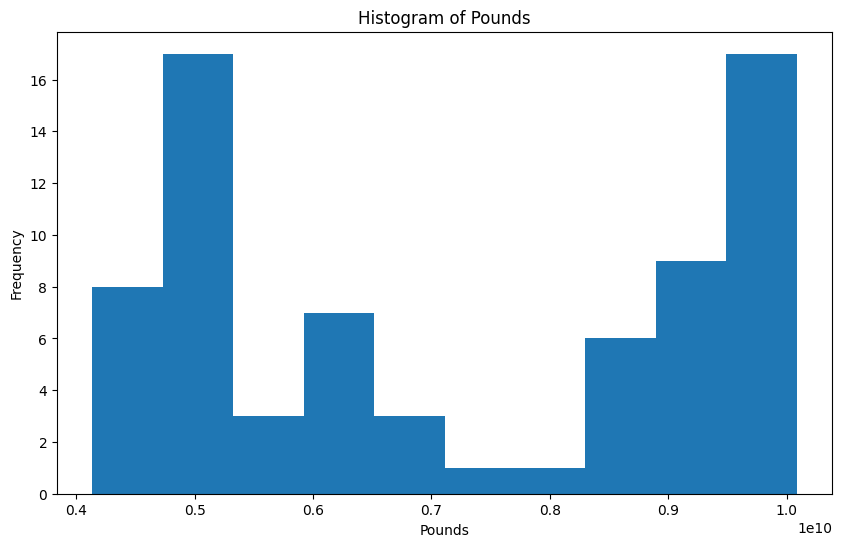

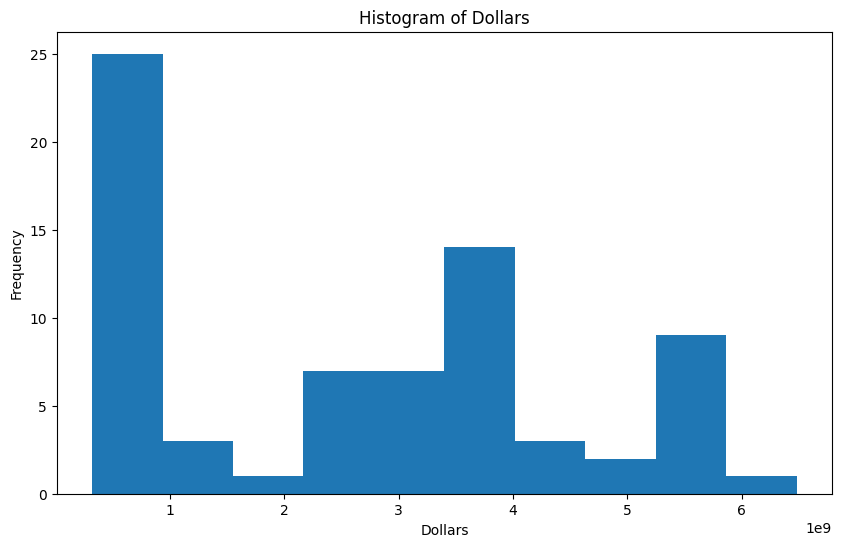

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Pounds'], bins=10)
plt.xlabel('Pounds')
plt.ylabel('Frequency')
plt.title('Histogram of Pounds')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Dollars'], bins=10)
plt.xlabel('Dollars')
plt.ylabel('Frequency')
plt.title('Histogram of Dollars')
plt.show()

In [15]:
df.to_csv('Updated-Total-Landings.csv')